# Progetto IDS
### Nicolò Calandra - Andrea Di Blasi

## Introduzione
In questo progetto andremo a creare un modello predittivo sulla formula 1.
L'obiettivo è di analizzare la correlazione tra posizione in qualifica e posizione in gara in base al tipo di circuito, che suddivideremo in 2 categorie: circuito ad alta velocità e circuito tecnico.
Con circuito tecnico intendiamo una pista ricca di curve, in cui il fattore più importante è la tecnica e bravura del pilota più che il veicolo che guida. Un circuito ad alta velocità, invece, è costituito da più rettilinei in cui la tecnica e la bravura del pilota sono meno influenti sul risultato della gara, bensì la potenza del veicolo influenza la posizione finale 


In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load the data
circuits = pd.read_csv("circuits.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")


In [178]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,circuitType
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Tecnico
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...,Misto
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...,Misto
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,Tecnico
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park,Tecnico


In [179]:
circuits.isnull().sum()

circuitId      0
circuitRef     0
name           0
location       0
country        0
lat            0
lng            0
alt            0
url            0
circuitType    0
dtype: int64

In [180]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [181]:
races.isnull().sum()

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

In [182]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [183]:
results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [184]:
# we now need to create a new dataframe containing grid position, final position, circuit name and category (high-speed or technical)

df = pd.merge(results, races, on='raceId', how='left', validate='m:1')  

df = pd.merge(df, circuits, on='circuitId', how='left', validate='m:1')

df.drop(['circuitRef', 'circuitId', 'resultId', 'raceId', 'url_y', 'driverId', 'constructorId', 'number', 'positionText', 'name_x', 'time_y','positionOrder', 'points', 'laps', 'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round', 'location', 'country', 'lat', 'lng', 'alt', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)

# we need to keep only grid 1-3 to determine the percentage of the podium to win
df = df[(df['grid'] <= 3) & (df['grid'] > 0)]

# we need to clean the data of drivers that did not conclude the race
df = df.replace('\\N', 0)

# we add a column based on the position of the driver
df['position'] = df['position'].astype(int)
df['placement'] = df['position'].apply(lambda x: 'Non arrivato' if x == 0 else 'Podio' if x <= 3 else 'Punti' if x <= 10 else 'No punti')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3391 entries, 0 to 26748
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   grid         3391 non-null   int64 
 1   position     3391 non-null   int64 
 2   date         3391 non-null   object
 3   name_y       3391 non-null   object
 4   circuitType  3391 non-null   object
 5   placement    3391 non-null   object
dtypes: int64(2), object(4)
memory usage: 185.4+ KB


,grid,position,date,name_y,circuitType,placement
0,1,1,2008-03-16,Albert Park Grand Prix Circuit,Tecnico,Podio
4,3,5,2008-03-16,Albert Park Grand Prix Circuit,Tecnico,Punti
8,2,0,2008-03-16,Albert Park Grand Prix Circuit,Tecnico,Non arrivato
22,2,1,2008-03-23,Sepang International Circuit,Misto,Podio
25,3,4,2008-03-23,Sepang International Circuit,Misto,Punti


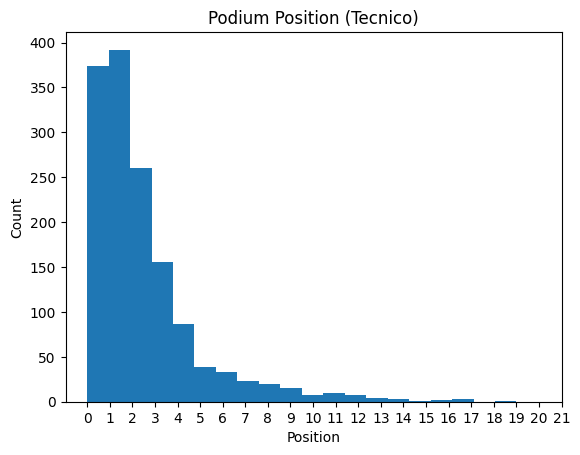

In [185]:
# we can now display the dataframe to see the results of the podium

position_technical = df[df["circuitType"] == "Tecnico"]
plt.hist(position_technical["position"].astype(int), bins=20)
plt.xlabel("Position") 
plt.ylabel("Count")
plt.title("Podium Position (Tecnico)")
plt.xticks(range(0, 22))
plt.show()


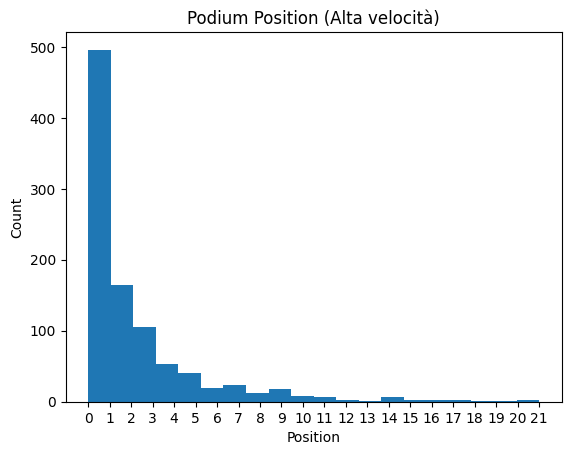

In [186]:
position_highspeed = df[df["circuitType"] == "Alta velocità"]
plt.hist(position_highspeed["position"].astype(int), bins=20)
plt.xlabel("Position") 
plt.ylabel("Count")
plt.title("Podium Position (Alta velocità)")
plt.xticks(range(0, 22))
plt.show()

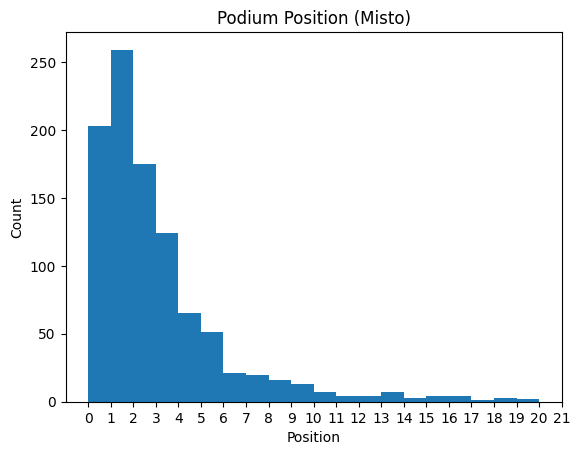

In [187]:
position_misto = df[df["circuitType"] == "Misto"]
plt.hist(position_misto["position"].astype(int), bins=20)
plt.xlabel("Position") 
plt.ylabel("Count")
plt.xticks(range(0, 22))
plt.title("Podium Position (Misto)")

plt.show()

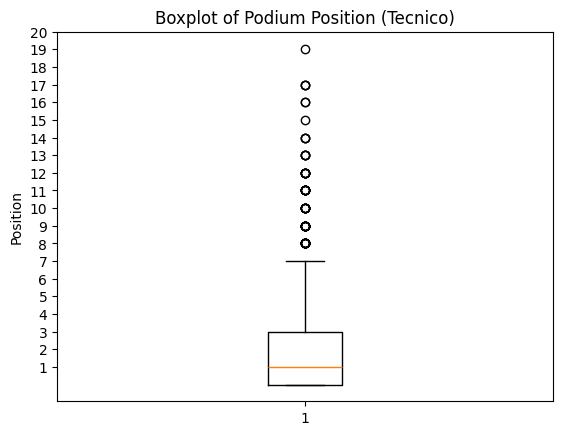

In [188]:
plt.boxplot(position_technical["position"].astype(int))
plt.yticks(range(1, 21))
plt.ylabel("Position")
plt.title("Boxplot of Podium Position (Tecnico)")
plt.show()

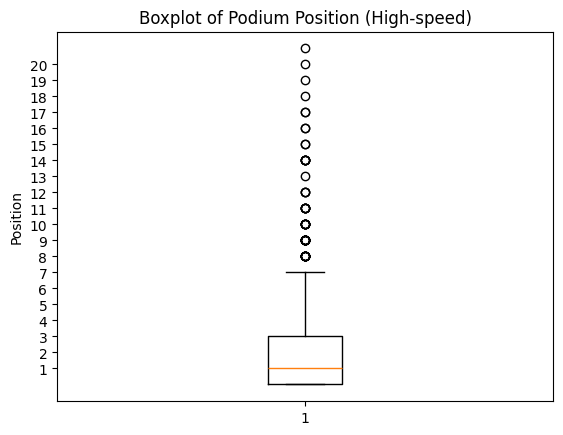

In [189]:
plt.boxplot(position_highspeed["position"].astype(int))
plt.yticks(range(1, 21))
plt.ylabel("Position")
plt.title("Boxplot of Podium Position (High-speed)")
plt.show()

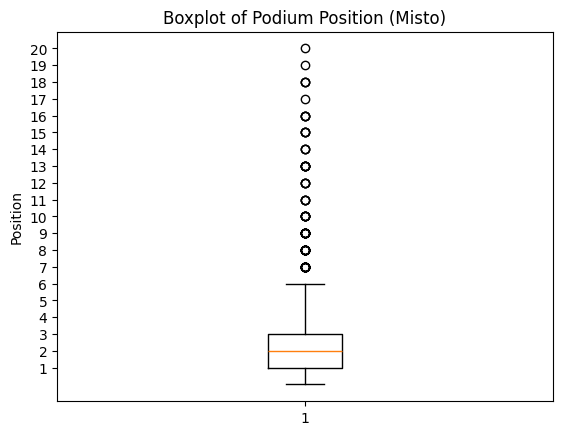

In [190]:
plt.boxplot(position_misto["position"].astype(int))
plt.yticks(range(1, 21))
plt.ylabel("Position")
plt.title("Boxplot of Podium Position (Misto)")
plt.show()

In [191]:
# We create categories to create an OLAP
placements = ["Podio", "Punti", "No punti", "Non arrivato"]
types = ["Tecnico", "Misto", "Alta velocità"]
grid = [1,2,3]

OLAP = np.zeros((3,4,3))
for z in range(0,len(types)):
  df_z = df[df['circuitType'] == types[z]]
  for j in range(0,len(placements)):
    for i in range(0,len(grid)):
      OLAP[i,j,z] = np.sum((df_z['grid'] == grid[i]) & (df_z['placement'] == placements[j]))

# alta velocita tempo medio di giro rispetto al tecnico
# confronto giro medio posizione inferiore e posizione superiore (il giro medio è più influente?) test a una coda
# linear regression: primo giro, grid e circuitType


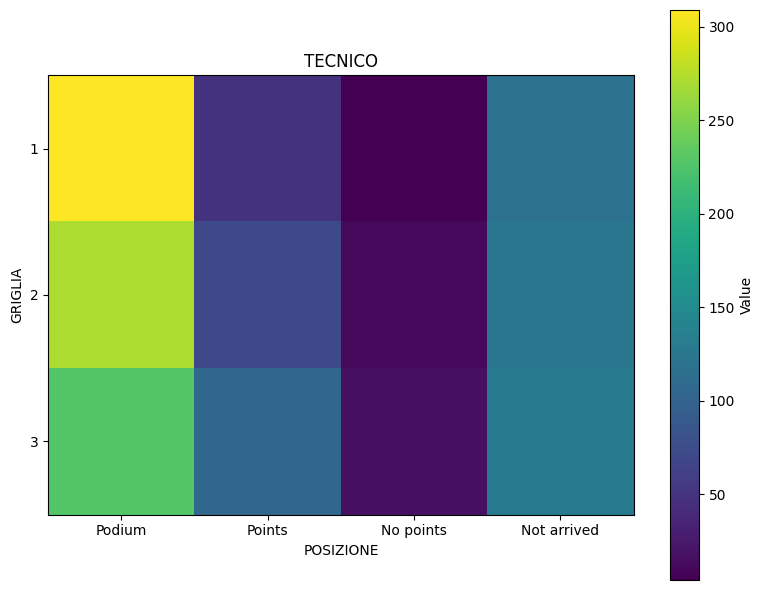

In [192]:
technical = OLAP[:,:,0]

plt.figure(figsize=(8,6))
plt.title('TECNICO')
plt.ylabel('GRIGLIA')
plt.yticks([0,1,2], ['1', '2', '3'])
plt.xlabel('POSIZIONE')
plt.xticks([0,1,2,3], ['Podium', 'Points', 'No points', 'Not arrived'])
plt.imshow(technical)
plt.colorbar(label = "Value")

plt.tight_layout()
plt.show()


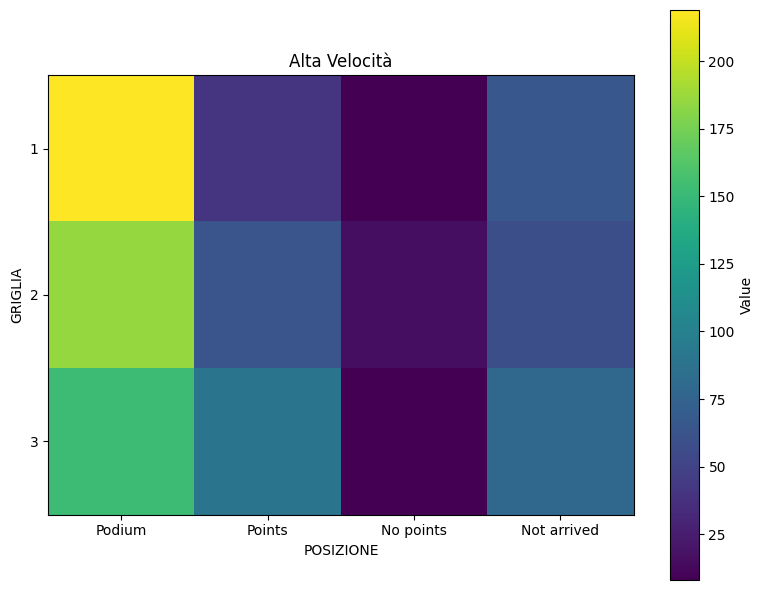

In [193]:
highspeed = OLAP[:,:,1]

plt.figure(figsize=(8,6))
plt.title('Alta Velocità')
plt.ylabel('GRIGLIA')
plt.yticks([0,1,2], ['1', '2', '3'])
plt.xlabel('POSIZIONE')
plt.xticks([0,1,2,3], ['Podium', 'Points', 'No points', 'Not arrived'])
plt.imshow(highspeed)
plt.colorbar(label = "Value")

plt.tight_layout()
plt.show()


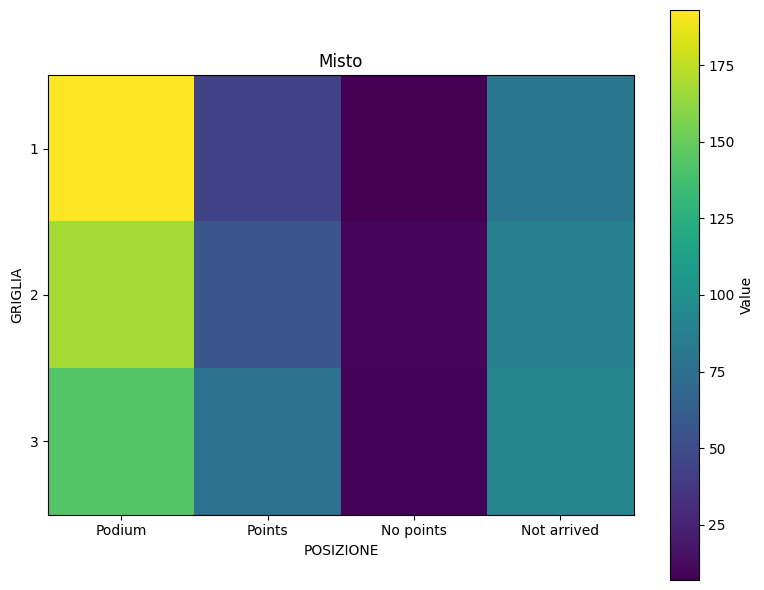

In [194]:
misto = OLAP[:,:,2]

plt.figure(figsize=(8,6))
plt.title('Misto')
plt.ylabel('GRIGLIA')
plt.yticks([0,1,2], ['1', '2', '3'])
plt.xlabel('POSIZIONE')
plt.xticks([0,1,2,3], ['Podium', 'Points', 'No points', 'Not arrived'])
plt.imshow(misto)
plt.colorbar(label = "Value")

plt.tight_layout()
plt.show()

# Test statistici

##### Il test statistico che vogliamo condurre consiste nel verificare se il giro medio dei piloti che iniziano in posizioni più basse, allora finiscono in posizione peggiore. Vogliamo quindi verificare che il giro medio sia più influente rispetto al tipo di circuito.

Ipotesi nulla: 
Il giro medio dei piloti che partono non sul podio è minore o uguale al giro medio dei piloti che partono sul podio.

Ipotesi alternativa: 
Il giro medio dei piloti che partono non sul podio è maggiore del giro medio dei piloti che partono sul podio.

Utilizziamo un t-test ad una coda con significatività 0.05.



In [ ]:
# Test statistici

laps = pd.read_csv('lap_times.csv')

# Aggiungiamo la posizione in griglia
laps = laps.merge(results[['raceId', 'driverId', 'grid']], on=['raceId', 'driverId'])
laps.head()



,raceId,driverId,lap,position,time,milliseconds,grid
0,841,20,1,1,1:38.109,98109,1
1,841,20,2,1,1:33.006,93006,1
2,841,20,3,1,1:32.713,92713,1
3,841,20,4,1,1:32.803,92803,1
4,841,20,5,1,1:32.342,92342,1


In [ ]:
# Creiamo un dataframe contenente il giro medio dei piloti che partono non sul podio e il giro medio dei piloti che partono sul podio per ogni circuito

def analisi_tempi_podio(laps):
    # Aggiungiamo una colonna che indica se il pilota è partito dal podio
    laps['partenza_podio'] = laps['grid'] <= 3
    
    # Calcoliamo il tempo medio del giro per ciascun pilota in ogni gara
    tempi_medi = laps.groupby(['raceId', 'driverId', 'partenza_podio'])['milliseconds'].mean().reset_index()
    
    # Ora calcoliamo la media dei tempi per gruppo (podio vs non-podio) per ogni circuito
    risultato = tempi_medi.groupby(['raceId', 'partenza_podio'])['milliseconds'].mean().reset_index()
    
    # Trasformiamo il dataframe per avere una riga per ogni circuito
    # e due colonne: tempo medio podio e tempo medio non-podio
    risultato_pivot = risultato.pivot(index='raceId', 
                                     columns='partenza_podio', 
                                     values='milliseconds')
    
    # Rinominiamo le colonne per chiarezza
    risultato_pivot.columns = ['tempo_medio_non_podio', 'tempo_medio_podio']
    
    # Calcoliamo anche la differenza tra i due
    risultato_pivot['differenza'] = risultato_pivot['tempo_medio_non_podio'] - risultato_pivot['tempo_medio_podio']
    
    # Resettiamo l'indice per avere raceId come colonna
    risultato_finale = risultato_pivot.reset_index()
    
    return risultato_finale

# Eseguiamo l'analisi
risultato = analisi_tempi_podio(laps)

# Mostriamo i primi risultati
print(risultato.head())
risultato = risultato[risultato['differenza'].notnull()]
risultato.isnull().sum()


   raceId  tempo_medio_non_podio  tempo_medio_podio   differenza
0       1           97381.470153       97122.131568   259.338585
1       2          110844.524481      108188.731183  2655.793298
2       3          130332.899515      126700.797619  3632.101896
3       4           98000.873332       96981.187135  1019.686198
4       5           93378.976104       88634.358586  4744.617518


raceId                   0
tempo_medio_non_podio    0
tempo_medio_podio        1
differenza               1
dtype: int64

In [205]:
# Test statistici

stats.ttest_ind(risultato['tempo_medio_non_podio'], risultato['tempo_medio_podio'], alternative='less')

TtestResult(statistic=nan, pvalue=nan, df=nan)